In [1]:
import torch
from torch import nn
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [2]:
from utils import Generator, Discriminator
from utils import Trainer
from utils import initialize_weights

In [3]:
G = Generator(in_channels=64, hid_channels=64, out_channels=1).to(device)
G_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))

D = Discriminator(in_channels=1, hid_channels=16).to(device) 
D_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [4]:
criterion = nn.BCEWithLogitsLoss()

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [6]:
dataset = MNIST('.', download=True, transform=transform)
generator = DataLoader(dataset, batch_size=128, shuffle=True)

In [7]:
G = G.apply(initialize_weights)
D = D.apply(initialize_weights)

In [8]:
trainer = Trainer(G, D, G_optimizer, D_optimizer, criterion, device)

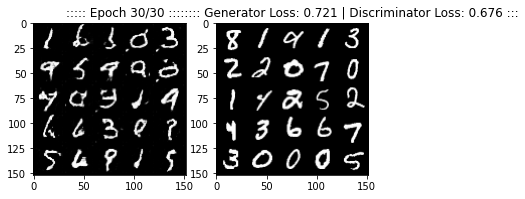

In [9]:
trainer.fit(generator, epochs=30, device=device)